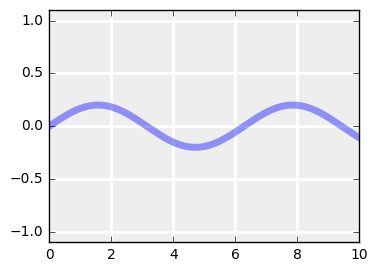

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, RadioButtons

amplitude_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.2)
color_buttons = RadioButtons(options=['blue', 'green', 'red'])
# decorate the plot function with an environment from the UIs:
@interact(amplitude=amplitude_slider, color=color_buttons)
def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                       subplot_kw={'axisbg':'#EEEEEE',
                                   'axisbelow':True})

    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
        lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)

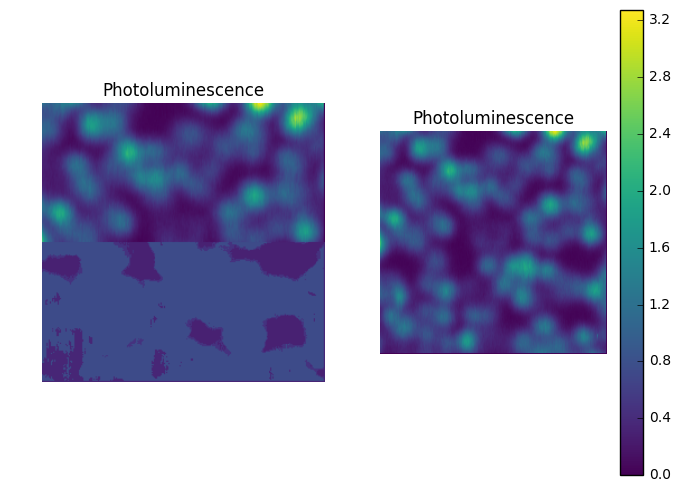

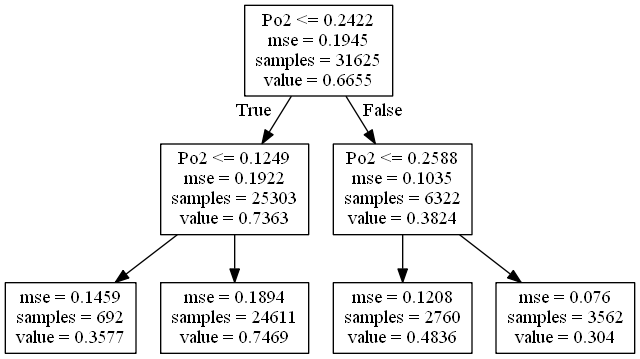

In [19]:
import numpy as np
import scipy.io
import scipy.optimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, interact_manual, FloatSlider, RadioButtons, IntSlider         #NEED THIS LINE (can use float numbers, predefined buttons or integers as well as many others for the widgets)
import pandas
import math
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import pydotplus
from sklearn import tree
from IPython.display import display, Image  

def myround(x, base):
    return (float(base) * round(float(x)/float(base)))

params = {
    'lines.markersize' : 3,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    
   }


#plp.rcParams.update(params)
plt.rcParams.update(params)
Ht2 = np.loadtxt('../data/MABr.1.Ht.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('../data/MABr.1.Po.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('../data/MABr.1.Ph.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('../data/MABr.1.Am.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('../data/MABr.1.Pl.txt',skiprows=0, dtype=np.float64)

# flatten the images
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()

plt.show()
X = [Ht2_flat, Po2_flat, Ph2_flat, Am2_flat]
X = np.array(X).T
Y = np.array(Pl2_flat).T


Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

depth_slider = IntSlider(min=1, max=20, step=1, value=2) #define the slider (set a min and max value, the step size for integers, and the default open value)
@interact_manual(Depth=depth_slider,continuous_update=False)    # allow it to be interactive and choose the variable the slider is changing. Tell it whether or not to continuously update or not

def plot(Depth):#,Xtrain,Xtest,Ytrain,Ytest,Ht2): #need this line as well for the variable to change..
    clf = DecisionTreeRegressor(max_depth=Depth)
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)

    x = Ht2.shape[0]
    y = Ht2.shape[1]
    k=0
    merge = np.concatenate((Ytrain,Ypred))
    Pl_predict = np.zeros((x,y))
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j] = merge[k]
            k = k + 1
        
    fig = plt.figure(figsize=(8,6))
    pl_ax = fig.add_subplot(121)
    pl_ax.imshow(Pl_predict, cmap='viridis')
    pl_ax.set_title('Photoluminescence')
    pl_ax.axis('off')
    pl_ax = fig.add_subplot(122)
    cax = pl_ax.imshow(Pl2, cmap='viridis')
    pl_ax.set_title('Photoluminescence')
    pl_ax.axis('off')
    fig.colorbar(cax)
    plt.show()
    
    if Depth <= 5:
        dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Ht2','Po2','Ph2','Am2'])
        graph = pydotplus.graph_from_dot_data(dot_data) 
        display(Image(graph.create_png()))  ## This one displays
    else:
        pass

C:\Users\Garrett\Miniconda3\lib\site-packages\ipykernel\__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


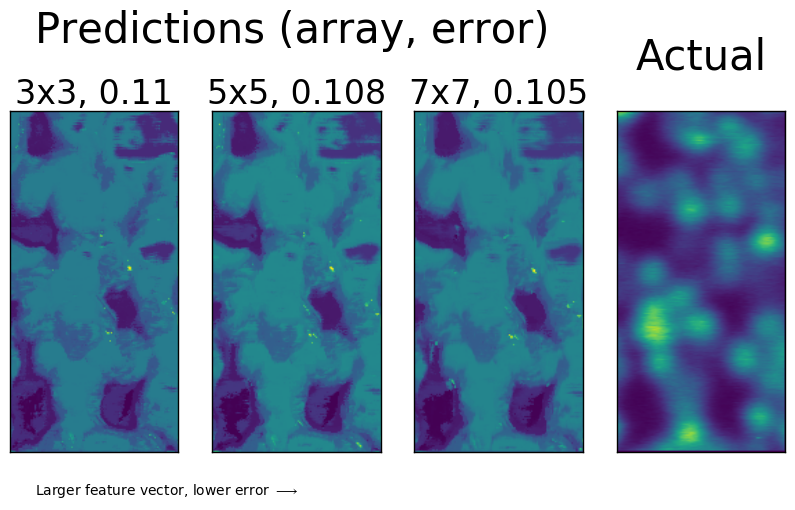

In [5]:
###User specified parameters
Ht2 = np.loadtxt('../data/MABr.1.Ht.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('../data/MABr.1.Po.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('../data/MABr.1.Ph.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('../data/MABr.1.Am.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('../data/MABr.1.Pl.txt',skiprows=0, dtype=np.float64)
inputs = [Ht2, Po2, Ph2, Am2]
x7x7 = [-3, -2, -1, 0, 1, 2, 3]
x5x5 = [-2, -1, 0, 1, 2]
x3x3 = [-1, 0, 1]
scores = [0.11, 0.108, 0.105]

stuff = [x3x3, x5x5, x7x7]
morestuff = ['3x3', '5x5', '7x7']
depths = 1
trees = 1

###Create training and testing arrays
x = Po2.shape[0]/2
x2 = Po2.shape[0]
y = Po2.shape[1]

fig = plt.figure(figsize=(10,10))  #### WHERE DOES HE PLUG IN THE DATA? (IMSHOW?)

for wes in range(3):
    pixelContext = stuff[wes]
    #print(pixelContext)
    Pl_predict = np.load('../numpy_files//%s.npy' %(morestuff[wes]))
    #print(Pl_predict)
    if wes == 2:
        pl_ax.text(-130,-50,'Predictions (array, error)', size=30)#.set_position([.5, 1.2])
        pl_ax.text(-130,280, 'Larger feature vector, lower error $\longrightarrow$')
    pl_ax = fig.add_subplot(1,4,(wes+1))

    pl_ax.imshow(Pl_predict.T, cmap='viridis')
    #pl_ax.set_title('%s Feature Vector, score: %s' %(morestuff[wes],scores[wes]), size=24)
    #pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
    #pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
    pl_ax.axes.get_xaxis().set_ticks([])
    pl_ax.axes.get_yaxis().set_ticks([])
    pl_ax.set_title('%s, %s' %(morestuff[wes],scores[wes]), size=24)
pl_ax2 = fig.add_subplot(1,4,4)

pl_ax2.set_title('Actual', size=30).set_position([.5, 1.1])
pl_ax2.imshow(Pl2[Pl2.shape[0]/2:,:].T, cmap='viridis')
pl_ax2.axes.get_xaxis().set_ticks([])
pl_ax2.axes.get_yaxis().set_ticks([])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                    wspace=None, hspace=None)
fig.savefig(filename='vector_variation_small_multiple', bbox_inches='tight')